# Argentina programa 4.0 - Módulo 2: Ciencia de Datos

---
## Ejercícios Semana 6. Regresion Polinomial


# Ejercicio 1: Regresión polinomial con datos reales: datos Properati

Volvamos al conjunto de datos Properati, que hemos usado en la semana anterior.

Despues de filtrar bien los datos, hicimos un modelo lienal para predecir el valor de las propiedades basados en su superfície:

precio [USD]=𝜔0+𝜔1⋅sup. total.

* ¿Qué pasa ahora si usamos un modelo polinomial?
* ¿Podemos chequear si un modelo más complejo describirá mejor esos datos?
* ¿Hasta que orden del polinómio tiene sentido ir?



---

Empecemos importando los datos, como hicimos en clase


In [ ]:
# Celdas preparatorias...
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Pandas
import pandas as pd

# Common imports
import numpy as np
import os
from scipy import stats as st

# Para hacer gráficos lindos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Aqui vamos a suponer que se grabó en el drive, en `MyDrive/Colab Notebooks`
los datos tal cual fueron descargados de
`https://www.kaggle.com/datasets/paulrohan2020/latin-america-properties-published-in-properati`, o sea, que vienen compactados y el archivo se llama `archive.zip`. Lo primero que vamos a hacer es extraer los archivos:

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

# cuando subimos el archivo desde Kaggle estaba compactado y lo descompactamosar_properties.csv con este comando:
#!unzip "/content/drive/MyDrive/Colab Notebooks/archive.zip"

# una vez que se extraigan los archivos, vamos atrabajar con el archivo ar_properties.csv que estará en:
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Y ahora vamos a leer el archivo que nos interesa con Pandas:

In [ ]:
df = pd.read_csv('ar_properties.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              848180 non-null   float64
 6   lon              847236 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946143 non-null   object 
 10  l4               233218 non-null   object 
 11  l5               4118 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            529819 non-null   float64
 14  bedrooms         431304 non-null   float64
 15  bathrooms        767293 non-null   float64
 16  surface_total    43

Ahora haremos las visualizaciones y todo el filtrado y selección de los datos como hicimos en la clase:

En primer lugar vamos a quedarnos solo con los registros en los que las variables que nos interesan tienen valores. Para eso, usamos el método `dropna`.

In [ ]:
# aquí estamos con el archivo original, así que mantenemos los nombres en inglés
df = df.dropna(subset=['price', 'surface_total'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405598 entries, 81 to 999997
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               405598 non-null  object 
 1   ad_type          405598 non-null  object 
 2   start_date       405598 non-null  object 
 3   end_date         405598 non-null  object 
 4   created_on       405598 non-null  object 
 5   lat              355869 non-null  float64
 6   lon              355869 non-null  float64
 7   l1               405598 non-null  object 
 8   l2               405598 non-null  object 
 9   l3               393456 non-null  object 
 10  l4               125140 non-null  object 
 11  l5               3197 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            278464 non-null  float64
 14  bedrooms         218024 non-null  float64
 15  bathrooms        336937 non-null  float64
 16  surface_total    405598 non-null  flo

Quitemos algunas columnas con muy pocos datos, como `l5` y `l6`

In [ ]:
# Con inplace=True, la variable df se sobreescribe
df.drop(['l5', 'l6'], axis=1, inplace=True)

Ahora algunos filtros:

1. nos quedamos solo con las propiedades en la Ciudad de Buenos Aires.

2. como la relación entre el precio y el tamaño puede cambiar significativamente de barrio en barrio, solo nos quedaremos con un barrio a elección (¡completen cada uno el valor del barrio!)
3. para tener un objeto más uniforme de estudio, solo utilizaremos las **ventas** de **casas**.

Como queremos que se cumplan todas las condiciones, las concatenamos con `&`.

In [ ]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
print(df)

                              id    ad_type  start_date    end_date  \
81      kX1S9LR59kaM+XADt1APWA==  Propiedad  2020-05-09  2020-05-20   
82      qJYE+KdNhbgncw/jczRtZQ==  Propiedad  2020-05-09  2020-05-20   
83      gAsyDGhS7mHk3uW2VMUdUg==  Propiedad  2020-05-09  2020-05-20   
85      Jz16H8Xzp4T6/x5CocCmgA==  Propiedad  2020-05-09  2020-05-20   
86      PruLMvOZplYroquDUHzbfw==  Propiedad  2020-05-09  2020-05-11   
...                          ...        ...         ...         ...   
999992  YbgpGVgkNOxeaOwtuLi22Q==  Propiedad  2020-08-27  2020-09-04   
999994  9jUAlxI59J1UZ0lRD7a8kg==  Propiedad  2020-08-27  2020-09-04   
999995  m8mRqlF9FbDmtLVgC+kWMA==  Propiedad  2020-08-27  2020-09-04   
999996  uNMbUwM2ht8k6oXFCZTEcg==  Propiedad  2020-08-27  2020-09-04   
999997  OKaXh0bc3HqxUU53d+ipLA==  Propiedad  2020-08-27  2020-09-04   

        created_on        lat        lon         l1                        l2  \
81      2020-05-09 -34.411681 -58.843421  Argentina  Bs.As. G.B.A.

In [ ]:
barrio = 'Coghlan'

df_filtro = df[(df.l2=='Capital Federal') &
               (df.l3 == barrio) &
               (df.property_type == 'Casa') &
               (df.operation_type == 'Venta')]

df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 13470 to 984253
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               53 non-null     object 
 1   ad_type          53 non-null     object 
 2   start_date       53 non-null     object 
 3   end_date         53 non-null     object 
 4   created_on       53 non-null     object 
 5   lat              51 non-null     float64
 6   lon              51 non-null     float64
 7   l1               53 non-null     object 
 8   l2               53 non-null     object 
 9   l3               53 non-null     object 
 10  l4               0 non-null      object 
 11  rooms            44 non-null     float64
 12  bedrooms         36 non-null     float64
 13  bathrooms        49 non-null     float64
 14  surface_total    53 non-null     float64
 15  surface_covered  51 non-null     float64
 16  price            53 non-null     float64
 17  currency  

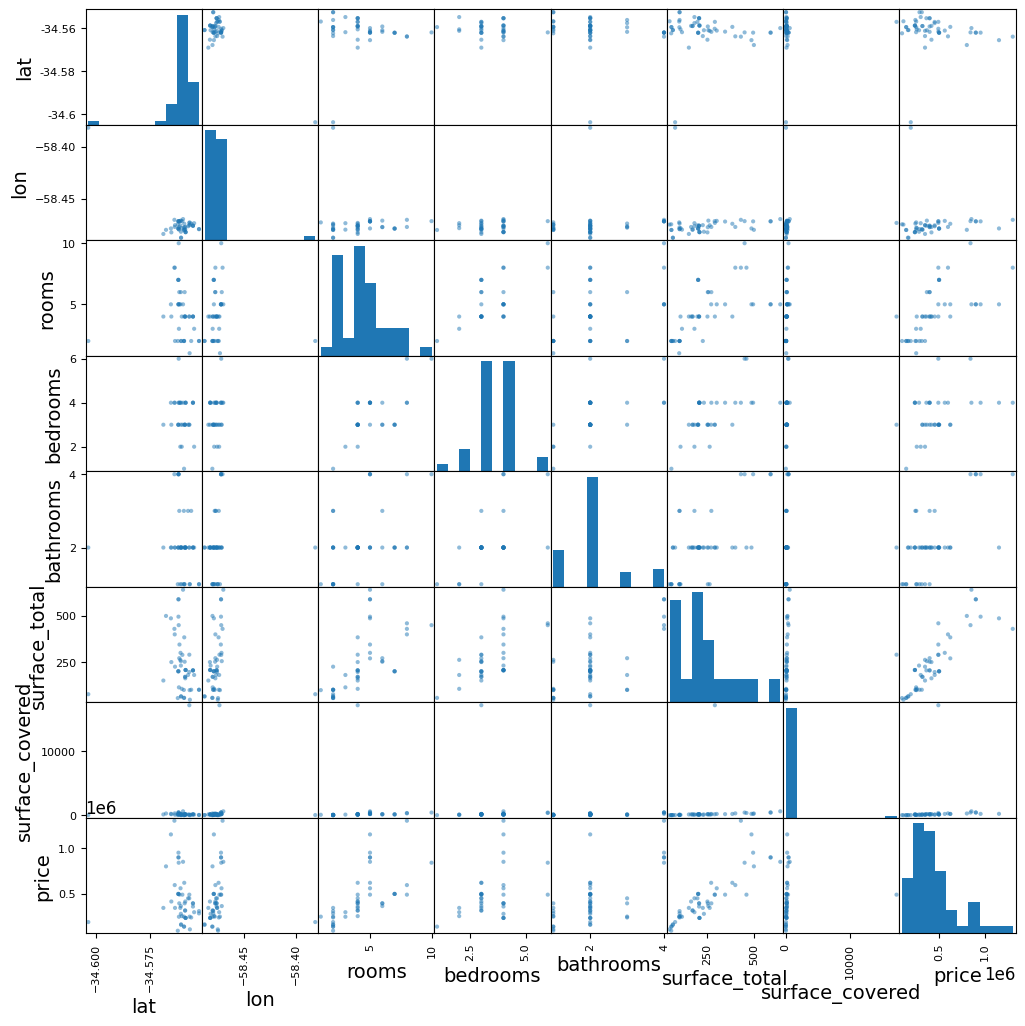

In [ ]:
_ = pd.plotting.scatter_matrix(df_filtro, figsize=(12, 12))

Vemos un par de outliers adicionales, en (lat, lon) y en sup_cubierta

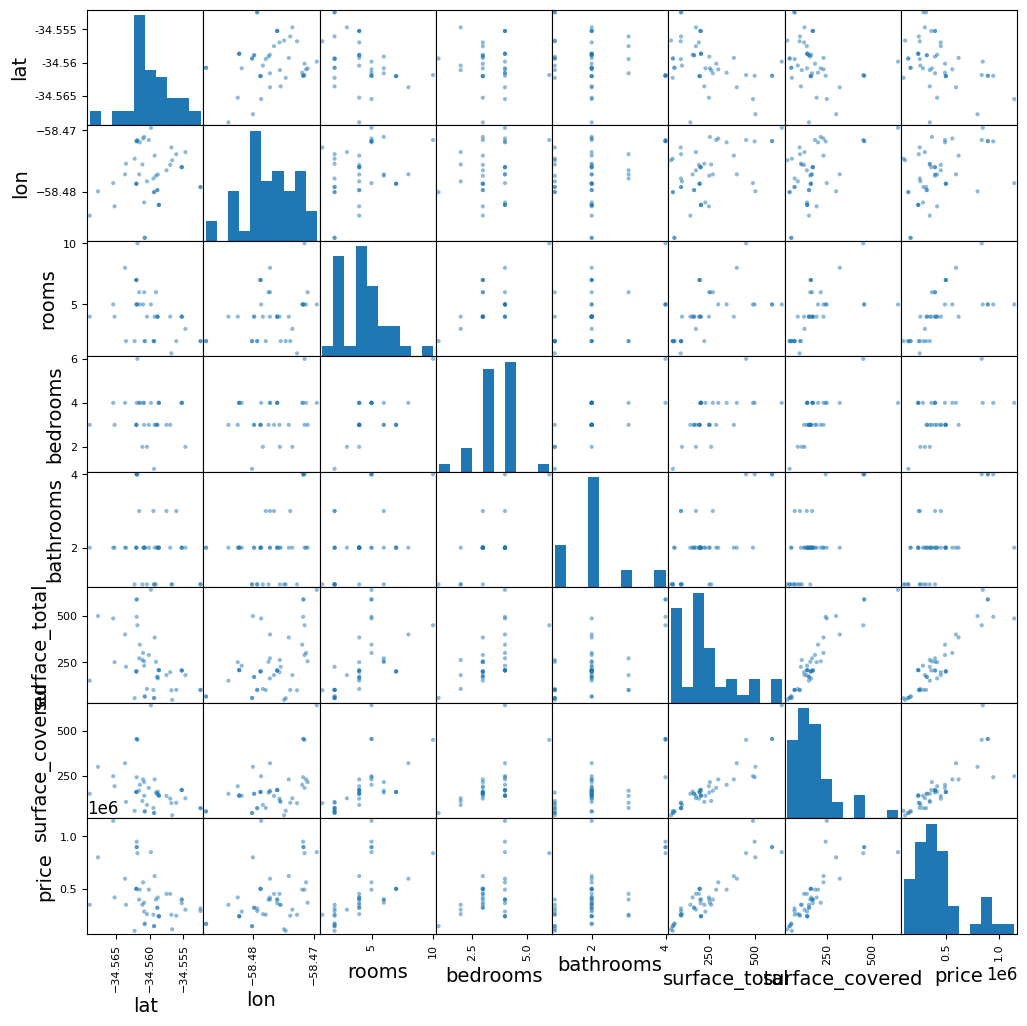

In [ ]:
df_filtro = df_filtro[(df_filtro.lon < -58.45) &
                      (df_filtro.surface_covered < 10000)]

_ = pd.plotting.scatter_matrix(df_filtro, figsize=(12, 12))

Perfecto! Ahora tenemos un dataset mucho más manejable, ideal para mostrar el funcionamiento de los modelos lineales.

PEro antes de arrancar, veamos que los precios de la casas esten expresados de manera consistente.

In [ ]:
# Pedimos los valores únicos de la variable "currency"
print(pd.unique(df_filtro.currency))

['USD' 'ARS']


Ah, vemos que hay algunas casas con precios en Pesos y otras en Dólares. Veamos cuántas de cada.

In [ ]:
pd.value_counts(df_filtro.currency)

USD    46
ARS     1
Name: currency, dtype: int64

In [ ]:
# Veamos el registro de esta casa
df_filtro[df_filtro.currency=='ARS']

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
639311,VnSkW6eEhTyZJprefI+nNg==,Propiedad,2020-07-28,2020-12-03,2020-07-28,-34.56101,-58.47132,Argentina,Capital Federal,Coghlan,...,2.0,300.0,230.0,560000.0,ARS,NaN,Casa Moderna 4 Dorm Patio Garage Taller Dep,Corredor Responsable: Juan Carlos Treco - CUCI...,Casa,Venta


Pareciera que se trata de un error de ingreso de los datos, y que la moneda debería ser `USD`. Podemos hacer el cambio a mano, solo para ser prolijos.

In [ ]:
# Cambiamos a mano el valor de la variable moneda para este registro
# Atención, hay que usar .loc
df_filtro.loc[df_filtro.currency=='ARS', 'currency'] = 'USD'

# Verificamos que ahora solo hay valores en dólares
df_filtro.value_counts('currency')

currency
USD    47
dtype: int64

Ahora calculemos el coeficiente de Correlación de Pearson entre la variable target y el resto de las variables numéricas

In [ ]:
df_filtro.corr(numeric_only=True).price.sort_values()

lat               -0.415589
lon                0.457666
bedrooms           0.474901
rooms              0.604886
bathrooms          0.636713
surface_covered    0.817229
surface_total      0.917875
price              1.000000
Name: price, dtype: float64

Vemos que existe una importante correlación entre el precio de venta y la superficie total (como era esperable!).

### Visualización

Hagamos una mínima visualización de lo que tenemos.

<Axes: xlabel='superfície total', ylabel='Precio [en USD]'>

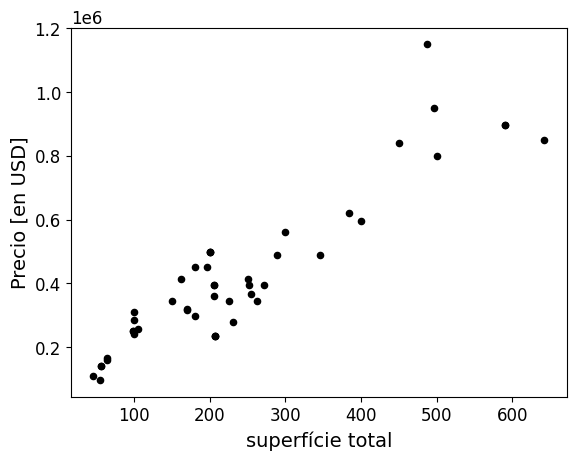

In [ ]:
df_filtro.plot(kind='scatter', x='surface_total', y='price', c='black',
               ylabel='Precio [en USD]', xlabel = 'superfície total')

Ahora sí estamos listos para arrancar. A partir de ahora tenemos un conjunto de `x = superfície total` y de `t = Precio [en USD]`.
Vamos a construir modelos polinomiales para esos datos.
* ¿Podemos chequear si un modelo más complejo describirá mejor esos datos?
* ¿Hasta que orden del polinómio tiene sentido ir?

Antes vamos a extraer las variables que nos interesan:

In [ ]:
# Variables predictoras (en una matriz, por eso la linea al final del nombre)
x = df_filtro.surface_total.values.reshape(-1, 1)
t = df_filtro.price.values

## Regresión polinomial

Armemos una regresión polinomial para la variable *target* (en este caso el precio de las casas) con la covariable (en este caso, la superficie total), *x_1*, utilizando esta fórmula:

$$
\text{precio [USD]} = \omega_0 + \omega_1 \cdot \text{sup. total} + \omega_2 \cdot \text{sup. total}^2 + \omega_3 \cdot \text{sup. total}^2 + ... \;\;,
$$

donde $\boldsymbol{\omega} = (\omega_0, \omega_1, \omega_2, \omega_3, ...)$ es el **vector de parámetros del modelo**.

Vamos a crear un pipeline para la regresión polinómica, como hicimos en clase:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regressor(M):
    pr = Pipeline([
        ('poly_features', PolynomialFeatures(M)),
        ('regressor', LinearRegression(fit_intercept=False) )])
    return pr

## ¿Hasta que orden tiene sentido ir?

Ya vimos que para saber hasta que orden tiene sentido ir, tenemos que separar el conjunto de datos en entrenamiento y prueva y después verificar como queda el MSE ajustado en función del orden del polinomio, parando cuando el MSE empiece a subir en el conjunto de testeo.

In [ ]:
from sklearn.model_selection import train_test_split

# Split in train and test
x_train, x_test, t_train, t_test = train_test_split(x, t, random_state=42)

Veamos como queda el MSE en el conjunto de entrenamiento y en el de testeo de los modelos ajustados por polinómios de distintos grados. Primero calcularmos los MSE

In [ ]:
from sklearn.metrics import mean_squared_error

# Crea una lista de grados (de los polinomios)
degrees = range(1, 10)

# inicializa listas
train_errors = []
test_errors = []
models = []

# itera sobre todos los grados
for M in degrees:
    # print(f"Grado del polinomio: {M}")

    # Crea el modelo polinomial
    pr = polynomial_regressor(M)

    # Hace el fit
    pr.fit(x_train, t_train)

    # Evalua los errores
    train_e = mean_squared_error(t_train, pr.predict(x_train))
    test_e  = mean_squared_error(t_test, pr.predict(x_test))

    # Graba los resultados en listas
    train_errors.append(train_e)
    test_errors.append(test_e)
    models.append(pr)

Y ahora hacemos la gráfica:

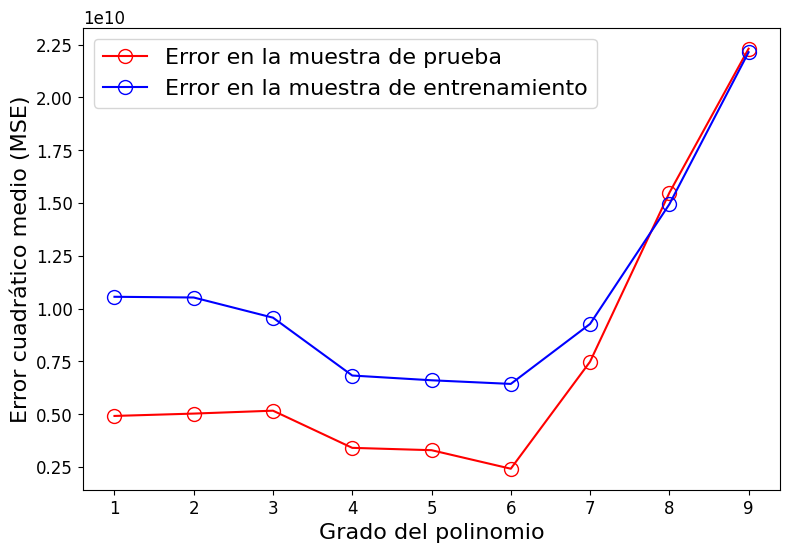

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(range(1, len(test_errors)+1), test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.plot(range(1, len(train_errors)+1), train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Aqui parecería que nos conviene ir hasta el grado 6. De hecho el MSE disminuye con el grado del polinomio y parece no sobre ajustar.

¿Pero relamente de la gráfica de `y` versus `x` les parece que podemos sacar tanta información de esos datos?

Veamos como quedan las gráficas de los ajustes para cada grado del polinómio

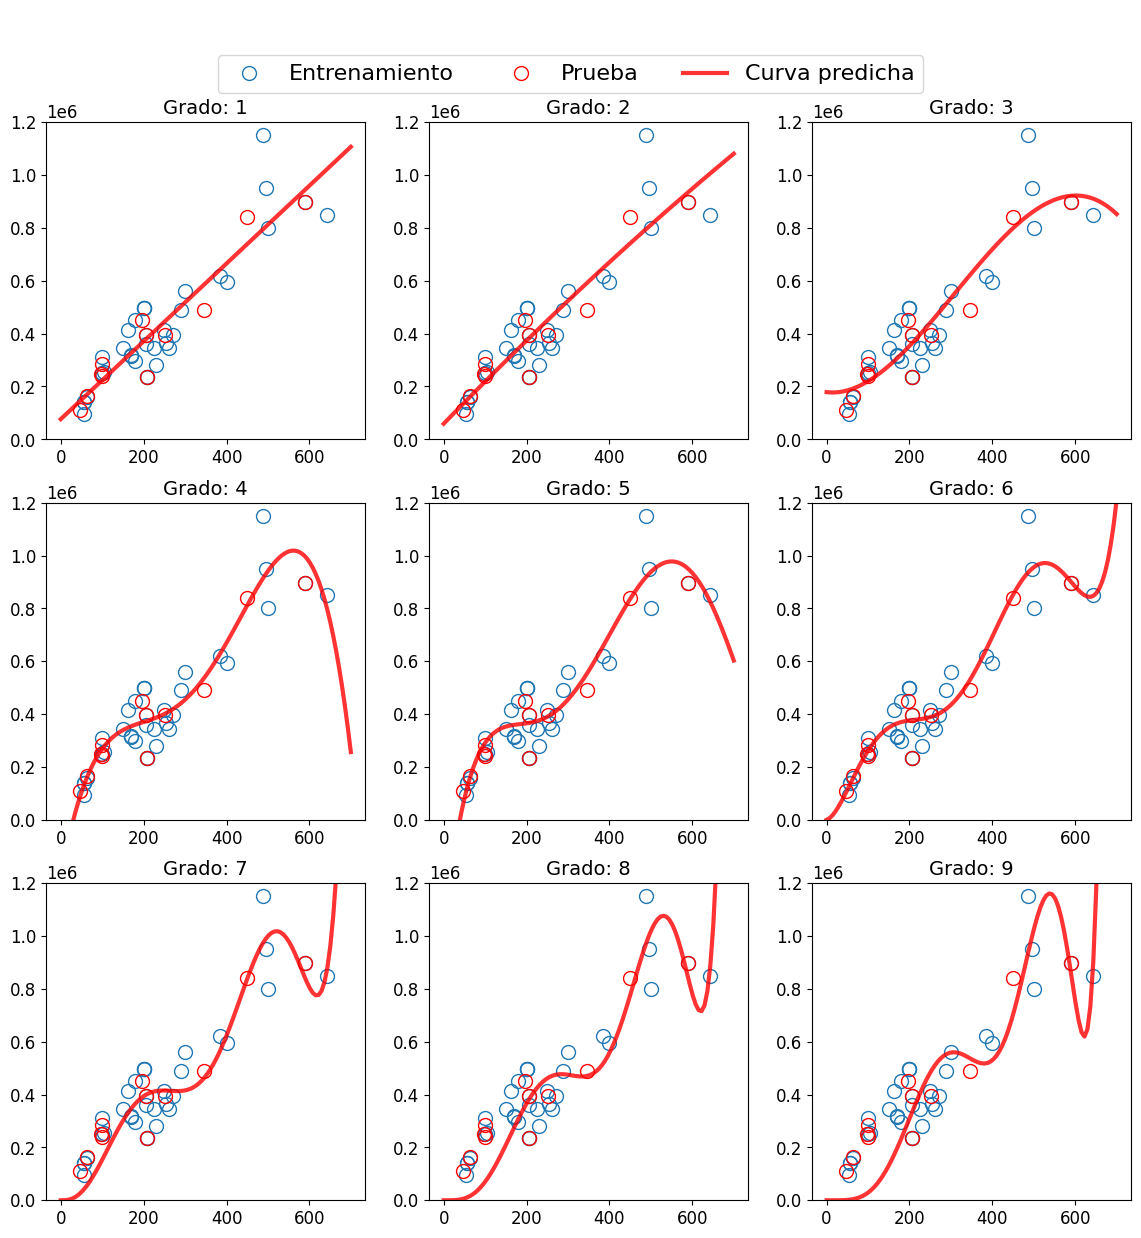

In [ ]:
# Hace multiples gráficas para los vários valores del orden del polinomio
ncolumns = 3

fig = plt.figure(figsize=(14, 14))

if len(models) % ncolumns == 0:
    extrarow = 0
else:
    extrarow = 1

axs = fig.subplots(ncols=ncolumns, nrows=int(np.floor(len(models)/ncolumns) + extrarow))

x_ = np.linspace(0,700, 100).reshape(-1,1)
for i, ax in zip(range(len(models)), axs.flatten()):
    ax.plot(x_train, y_train, 'o', ms=10, mfc='None', label='Entrenamiento')
    ax.plot(x_test, y_test, 'or', ms=10, mfc='None', label='Prueba')
    ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
    #
    ax.set_title('Grado: {}'.format(models[i]['poly_features'].degree), fontsize=14)
    #
    ax.set_ylim(0, 1.2e6)

# Misma leyenda para todos
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='upper center', ncol=len(handles),
               fontsize=16, borderaxespad=2.5)

¡Aún haciendo la separación entre entrenamiento y testeo, parece sobre-ajustar!

¿Que estará pasando?

Hagan nuevamente la separación entrenamiento x testeo sin fijar la semilla y vean como queda el resultado. Repitan ese camino algunas veces. ¿Que encuentran? Quizás habría que separar várias veces en conjuntos de entrenamiento y testeo, como veremos en la próxima clase...


# Otra forma de regularizar: Lasso

Observación: esa parte la hicimos en clase y está en el `Notebook_Semana6_RegresionPolinomial_2.ipynb`, así que pasemos directamente al ejercício avanzado.

---

# Ejercicio 2 (avanzado): como elegir los hiperparámetros con regularización?

En este ejercicio discutiremos una forma de elegir los mejores hperparámetros de la regresión polinomial con regularización, o sea, los valores de M y de $\lambda$. En ese camino profundizaremos el concepto de balance cesgo-varianza.

En las próximas clases veremos una forma más eficiente/robusta de optimizar los hiperparámetros.

Hasta ahora, hemos elegido un polinomio de grado nueve y un valor fijo para el parámetro de regularización. Pero, ¿cómo sabemos que estos valores son los óptimos?

Al igual que hicimos con el regresor polinómico no regularizado, podemos utilizar el conjunto de pruebas para evaluar cuál es el valor óptimo del grado *M* y del parámetro de regularización $\lambda$.

* Elija uno de los dos métodos de regularización que hemos discutido anteriormente.
* Haga un bucle sobre los valores de grado y lambda y evalúe el modelo utilizando el conjunto de pruebas.
* Elegir los mejores valores de $M$ y $\lambda$ en base a estos resultados.
* Repita para el otro regularizador.
* Informe de la mejor métrica de rendimiento (MSE) en el conjunto de prueba.
* Prepare un gráfico que muestre el MSE de la prueba en función de los valores de los hiperparámetros. Dado que hay dos hiperparámetros, quizás quieras probar con `plt.imshow` o `plt.pcolor`.

**Pregunta importante**: ¿piensan que ese valor del error cuadrático medio es representativo de lo que obtendría para datos que aún no se han visto en este proceso? ¿Que podría pasar en ese caso?

***

# Solución

Antes de todo, creamos nuestro conjunto de datos fictício y separemos en conjuntos de entrenamiento y uno de prueba

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


N_SAMPLES = 20 # cuantos datos vamos a generar (cuantos pares {t,x}, líneas de una base de datos, etc.)
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)

# Fijamos la semilla aleatoria, por si queremos reproducir exactamente los mismos resultados en otro momento
np.random.seed(42)

# Generamos puntos a partir de ella
def ground_truth(x):
    return 4 * x + 2 * np.sin(x*6)

# Agregamos ruido a los datos
t = ground_truth(x) + 0.5*np.random.randn(N_SAMPLES,1)

# Separamos en entrenamiento y prueba
x_train, x_test, t_train, t_test = train_test_split(x, t, random_state=42)

Conviene siempre visualuzar los datos para certificarse que esté todo bien:


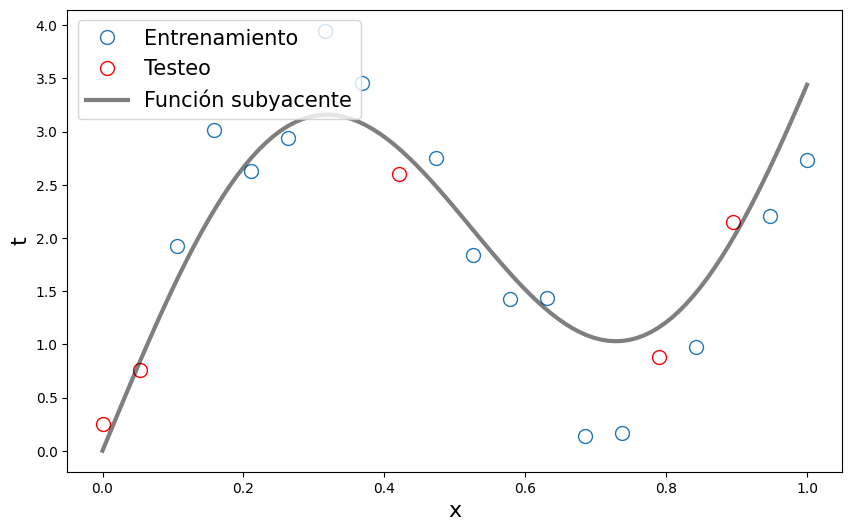

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_ = np.linspace(0,1, 100).reshape(-1,1)
ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
ax.plot(x_test, t_test, 'or', ms=10, mfc='None', label='Testeo')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función subyacente')
ax.legend(loc=2, fontsize=15)

plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

## Elija uno de los dos métodos de regularización que hemos discutido anteriormente.

Primero haremos todo con el método de regularización de ridge

Creamos la función ridge que genera un objeto Pipeline implementando la regresión de ridge.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def ridge(m, lam):
    """
    Construye un pipeline para la regresión contraída

    :param int m: grado del polinomio de las características
    :param float ll: coeficiente de regularización lambda

    atención: la función ridge toma como argumento alpha = lambda/2
    """
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Ridge(alpha=lam/2.0,fit_intercept=False))])

## Haga un bucle sobre los valores de grado y lambda y evalúe el modelo utilizando el conjunto de pruebas.

Primero haremos um bucle en M, también de 1 a 9 y veamos como queda el error cuadrático medio (MSE) en función de $M$. Por ahora fijaremos $\lambda = 0.001$.

Después haremos un bucle en $\lambda$ con $M$ fijo. Y finalmente haremos un bucle doble y una gráfica 2D para elejir la mejor combinación de los dos hiperparámetros.

In [ ]:
from sklearn.metrics import mean_squared_error

# Crea una lista de grados (de los polinomios)
degrees = range(1, 10)
lam = 0.001

# inicializa listas
train_errors = []
test_errors = []
models = []

# itera sobre todos los grados
for M in degrees:
    #print(f"Grado del polinomio: {M}")

    # Crea el modelo polinomial
    pr = ridge(M, lam)

    # Hace el fit
    pr.fit(x_train, t_train)

    # Evalua los errores
    # (no usaremos más la función compute_errors definda en clase, para que no nos imprima todos lo MSE en la pantalla)
    train_e = mean_squared_error(t_train, pr.predict(x_train))
    test_e  = mean_squared_error(t_test, pr.predict(x_test))

    # Graba los resultados en listas
    train_errors.append(train_e)
    test_errors.append(test_e)
    models.append(pr)

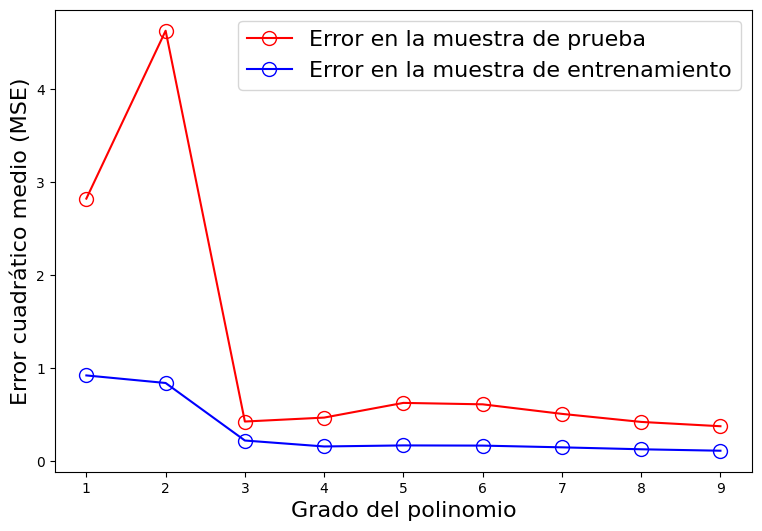

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(range(1, len(test_errors)+1), test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.plot(range(1, len(train_errors)+1), train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Vean que, como esperado, ¡no tenemos más overfitting! Con eso el MSE en el conjunto de entrenamiento también para de disminuir. Igual parece que conviene ir hasta M = 9 para tener el menor MSE en los dos conjuntos.

Pero ¿no dependerá de $\lambda$ ese resultado?

Miremos ahora que pasa con vários valores de $\lambda$ distribuídos logarítmicamente, fijando arbitráriamente a M en 5:

In [ ]:
# conjunto de valores de lambda (espaciados de forma logarítmica entre 10^-7 y 1)
lls = np.logspace(-7, 0, 20)

# Fijamos M
M = 5

# inicializa listas
train_errors = []
test_errors = []
models = []

# Itera sobre los valores de lambda
for ll in lls:
    #print(f"Valor de Lambda: {ll}")

    # Crea el modelo polinomial
    pr = ridge(M, ll)

    # Hace el fit
    pr.fit(x_train, t_train)

    # Evalua los errores
    train_e = mean_squared_error(t_train, pr.predict(x_train))
    test_e  = mean_squared_error(t_test, pr.predict(x_test))

    # Graba los resultados en listas
    train_errors.append(train_e)
    test_errors.append(test_e)
    models.append(pr)

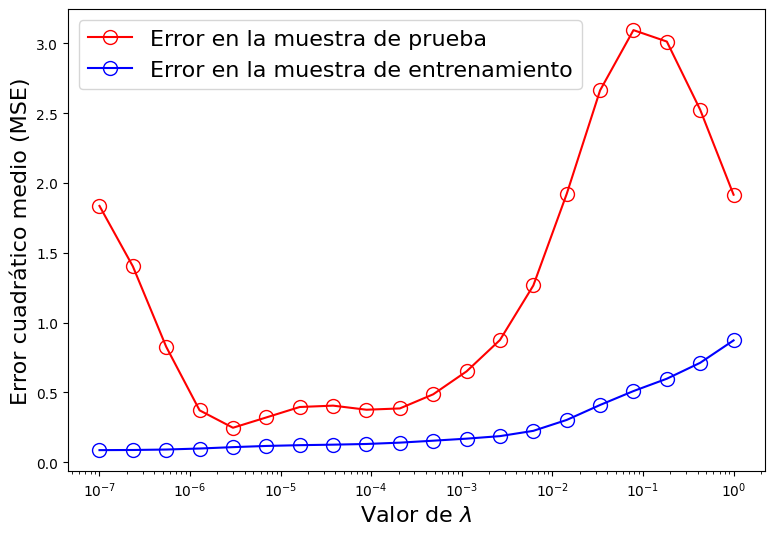

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.semilogx(lls, test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.semilogx(lls, train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')

_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Valor de $\lambda$', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Vean que, cuanto menor el valor de $\lambda$, menos regularización. Para $\lambda ≲ 3 \times 10^{-6}$, tenemos claramente un sobre-ajuste. O sea, la regularización no es suficiente para evitar el _overfitting_. Para valores más grandes de $\lambda$ la calidad del MSE pasa a disminuir. O sea, el témino de la norma L2 en la función error pasa a tener un peso más grande y no conviene tanto disminuir el MSE en relación a la norma del vector de pesos.

¡Eso es la dicotomía sesgo-varianza! Evitar el overfit es disminuir la varianza en los pesos. O sea, los pesos quedan mejor determinados con la regularización. Los pesos ya no tienen enormes variaciones con pequeños cambios del _dataset_. Por otro lado, la regularización termina induciendo un cesgo, o sea, empeorando la calidad del fita, lleavando a un MSE mayor.

En la gráfica de arriba, queda bien claro que hay un valor de $\lambda$ óptimo, para el cual tenemos el menor cesgo (menos MSE), sin que haya overfit. Ese valor es $\lambda \simeq 3 \times 10^{-6}$. O sea, se obtiene un balance sesgo-varianza ideal.

Pero todo eso fue con un valor fijo del grado del polinómio M. Ahora optimizemos simultaneamente los dos hiperparámetros.

Para eso hagamos un bucle simultaneamente en $\lambda$ y en M y grabemos los valores del MSE en los conjuntos de entrenamiento y testeo. Como no vamos a imprimir los valores del MSE y como queremos encontrar los parámetros con cierta precisión, pondremos más densidad de puntos en nuestros bucles, para un mismo rango de $\lambda$ y M.

In [ ]:
# Crea una lista de grados (de los polinomios)
degrees = range(1, 15)

# conjunto de valores de lambda (espaciados de forma logarítmica entre -5 y 0)
lls = np.logspace(-7, 0, 30)

# inicializa listas
train_errors = []
test_errors = []
models = []
lam = []
ValoresM = []

# itera sobre todos los grados
for M in degrees:
    # para generar un array 2D del los valores del MSE
    # Itera sobre los valores de lambda
    for ll in lls:
        # Crea el modelo polinomial
        pr = ridge(M, ll)

        # Hace el fit
        pr.fit(x_train, t_train)

        # Evalua los errores
        train_e = mean_squared_error(t_train, pr.predict(x_train))
        test_e  = mean_squared_error(t_test, pr.predict(x_test))

        # para encontrar los mímimos, lo más simple es guardar todo en un array
        train_errors.append(train_e)
        test_errors.append(test_e)
        lam.append(ll)
        ValoresM.append(M)
        models.append(pr)

Lo que nos interesa es saber los valores de M y $\lambda$ que corresponden al **menor valor del MSE en el conjunto de testeo**:

In [ ]:
minimumMSE = min(test_errors)
print('El menor valor del MSE fue: ', "{:.3g}".format(minimumMSE))

position = test_errors.index(minimumMSE)

print('Los valores correspondientes de los hiperparámetros son: lambda = ', "{:.3g}".format(lam[position]), ' M = ', "{:.3g}".format(ValoresM[position]))

El menor valor del MSE fue:  0.22
Los valores correspondientes de los hiperparámetros son: lambda =  7.88e-05  M =  8


## Informe de la mejor métrica de rendimiento (MSE) en el conjunto de prueba.

El menor valor del MSE en el conjunto de prueba fue: 0.22

## Prepare un gráfico que muestre el MSE de la prueba en función de los valores de los hiperparámetros. Dado que hay dos hiperparámetros, quizás quieras probar con `plt.imshow` o `plt.pcolor`.

In [ ]:
# Hacemos un bucle doble, como en el caso anterior, pero ahora armaremos un array 2D para hacer la gráfica
# Crea una lista de grados (de los polinomios)
degrees = range(1, 15)

# conjunto de valores de lambda (espaciados de forma logarítmica entre -5 y 0)
lls = np.logspace(-7, 0, 15)

# inicializa listas
test_errors_2D = []

# itera sobre todos los grados
for M in degrees:
    # para generar un array 2D del los valores del MSE
    lineas = []
    # Itera sobre los valores de lambda
    for ll in lls:
        # Crea el modelo polinomial
        pr = ridge(M, ll)

        # Hace el fit
        pr.fit(x_train, t_train)

        # Evalua los errores
        train_e = mean_squared_error(t_train, pr.predict(x_train))
        test_e  = mean_squared_error(t_test, pr.predict(x_test))

        lineas.append(test_e)

    # para el plot 2D, guardamos como una matrix
    test_errors_2D.append(lineas)

Ahora hacemos la gráfica usando `plt.imshow`

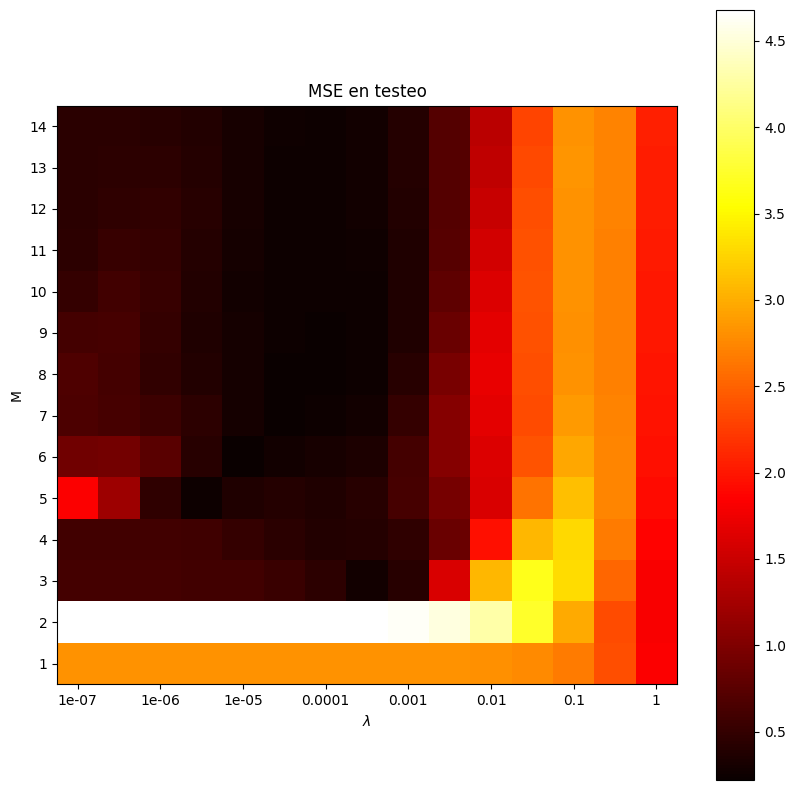

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Hagamos la gráfica de colores de test_errors en función de los valores de lambda y M
plt.imshow(test_errors_2D, cmap='hot', origin='lower')

plt.yticks(range(len(degrees)), degrees)
# Para que no se nos llene demasiado la imagen, vamos mostrar salteando de a 10 valores de Lambda
paso = 2
# Convierte a un string con 2 dígitos significativos
lambda_redondeado = ["{:.2g}".format(valor) for valor in lls]
# Elije a cada 2
lambda_seleccionado = lambda_redondeado[::paso]

plt.xticks(range(0, len(lls), paso), lambda_seleccionado)

# Agrega la barra de colores
plt.colorbar()

# Agrega los ejes y el título
plt.xlabel('$\lambda$')
plt.ylabel('M')
plt.title('MSE en testeo')

# Show the plot
plt.show()

Claramente los menores valores del MSE ocurren para $\lambda$ entre $10^{-5}$ y $10^{-4}$, aunque no se ve claramente que el mínimo está en M = 8, justamente porque el resultado no depende mucho de M, como vimos en la primer gráfica.

## Repita para el otro regularizador

Ahora repetiramos todos los pasos anteriores para la regularización L1

Creamos la función ridge que genera un objeto Pipeline implementando la regresión **LASSO (_least absolute shrinkage and selection operator_ / operador de reducción y selección mínima absoluta)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoLars

def lasso(m, ll):
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Lasso(alpha=ll/2.0, fit_intercept=False, max_iter=5000000))])

Vean que aquí fue necesario aumentar el número máximo de iteraciones para que la minimización pueda convergir para algunos valores extremos de lambda.

## Haga un bucle sobre los valores de grado y lambda y evalúe el modelo utilizando el conjunto de pruebas.

Primero haremos um bucle en M, también de 1 a 9 y veamos como queda el error cuadrático medio (MSE) en función de $M$. Por ahora fijaremos $\lambda = 0.001$.

Después haremos un bucle en $\lambda$ con $M$ fijo. Y finalmente haremos un bucle doble y una gráfica 2D para elejir la mejor combinación de los dos hiperparámetros.

In [ ]:
from sklearn.metrics import mean_squared_error

# Crea una lista de grados (de los polinomios)
degrees = range(1, 10)
lam = 0.001

# inicializa listas
train_errors = []
test_errors = []
models = []

# itera sobre todos los grados
for M in degrees:
    #print(f"Grado del polinomio: {M}")

    # Crea el modelo polinomial
    pr = lasso(M, lam)

    # Hace el fit
    pr.fit(x_train, t_train)

    # Evalua los errores
    # (no usaremos más la función compute_errors definda en clase, para que no nos imprima todos lo MSE en la pantalla)
    train_e = mean_squared_error(t_train, pr.predict(x_train))
    test_e  = mean_squared_error(t_test, pr.predict(x_test))

    # Graba los resultados en listas
    train_errors.append(train_e)
    test_errors.append(test_e)
    models.append(pr)

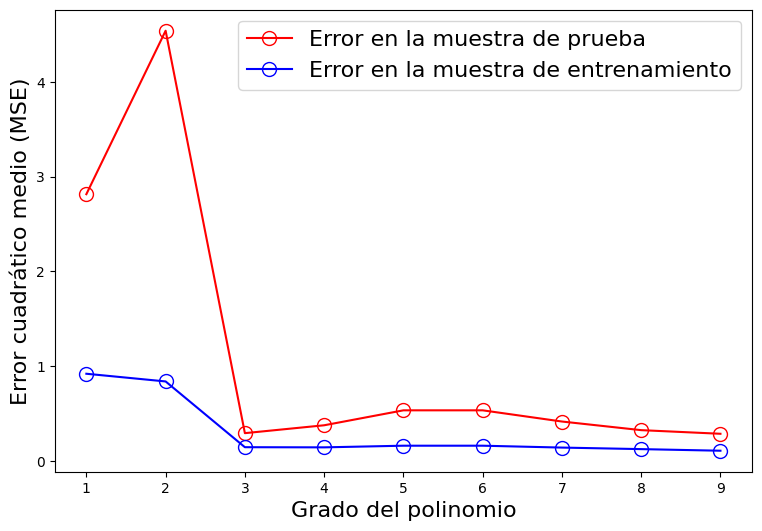

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(range(1, len(test_errors)+1), test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.plot(range(1, len(train_errors)+1), train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Es figura no cambió mucho en relación a la que hicimos con ridge. Veamos ahora como cambia con $\lambda$.

In [ ]:
# conjunto de valores de lambda (espaciados de forma logarítmica entre 10^-7 y 1)
lls = np.logspace(-8, -1, 10)

# Fijamos M
M = 5

# inicializa listas
train_errors = []
test_errors = []
models = []

# Itera sobre los valores de lambda
for ll in lls:
    #print(f"Valor de Lambda: {ll}")

    # Crea el modelo polinomial
    pr = lasso(M, ll)

    # Hace el fit
    pr.fit(x_train, t_train)

    # Evalua los errores
    train_e = mean_squared_error(t_train, pr.predict(x_train))
    test_e  = mean_squared_error(t_test, pr.predict(x_test))

    # Graba los resultados en listas
    train_errors.append(train_e)
    test_errors.append(test_e)
    models.append(pr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.525e-01, tolerance: 8.439e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.428e-01, tolerance: 8.439e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.886e-01, tolerance: 8.439e

¿Notaron alguna diferencia en el tiempo de ejecución?

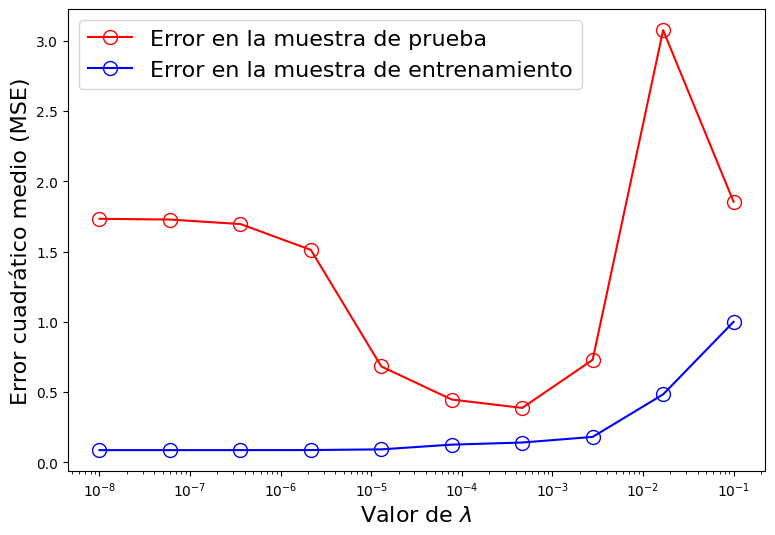

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.semilogx(lls, test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.semilogx(lls, train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')

_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Valor de $\lambda$', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Vean que, cuanto menor el valor de $\lambda$, menos regularización. Para $\lambda ≲ 3 \times 10^{-4}$, tenemos claramente un sobre-ajuste. O sea, la regularización no es suficiente para evitar el _overfitting_. Para valores un poco más grandes de $\lambda$ la calidad del MSE pasa a disminuir. O sea, el témino de la norma L1 en la función error pasa a tener un peso más grande y no conviene tanto disminuir el MSE en relación a la norma del vector de pesos.

Nuevamente, eso es la dicotomía sesgo-varianza. Evitar el overfit es disminuir la varianza en los pesos. O sea, los pesos quedan mejor determinados con la regularización. Los pesos ya no tienen enormes variaciones con pequeños cambios del _dataset_. Por otro lado, la regularización termina induciendo un cesgo, o sea, empeorando la calidad del fita, lleavando a un MSE mayor.

En la gráfica de arriba, queda bien claro que hay un valor de $\lambda$ óptimo, para el cual tenemos el menor cesgo (menos MSE), sin que haya overfit. Ese valor es $\lambda \simeq 5 \times 10^{-5}$ en esta caso. O sea, se obtiene un balance sesgo-varianza ideal.

Ahora veamos como queda la optimización simultanea de los dos hiperparámetros. Para eso hagamos un bucle simultaneamente en $\lambda$ y en M y grabemos los valores del MSE en los conjuntos de entrenamiento y testeo. Aqui vamos a calcular menos valores que en el caso del `ridge`, porque el tiempo computacional es mucho mayor (¿Por qué?)

In [ ]:
# Crea una lista de grados (de los polinomios)
degrees = range(2, 12)

# conjunto de valores de lambda (espaciados de forma logarítmica entre -5 y 0)
lls = np.logspace(-7, -1, 10)

# inicializa listas
train_errors = []
test_errors = []
models = []
lam = []
ValoresM = []

# itera sobre todos los grados
for M in degrees:
    # para generar un array 2D del los valores del MSE
    # Itera sobre los valores de lambda
    for ll in lls:
        # Crea el modelo polinomial
        pr = lasso(M, ll)

        # Hace el fit
        pr.fit(x_train, t_train)

        # Evalua los errores
        train_e = mean_squared_error(t_train, pr.predict(x_train))
        test_e  = mean_squared_error(t_test, pr.predict(x_test))

        # para encontrar los mímimos, lo más simple es guardar todo en un array
        train_errors.append(train_e)
        test_errors.append(test_e)
        lam.append(ll)
        ValoresM.append(M)
        models.append(pr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.351e-01, tolerance: 8.439e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.710e-01, tolerance: 8.439e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e-01, tolerance: 8.439e

Lo que nos interesa es saber los valores de M y $\lambda$ que corresponden al **menor valor del MSE en el conjunto de testeo**:

In [ ]:
minimumMSE = min(test_errors)
print('El menor valor del MSE fue: ', "{:.3g}".format(minimumMSE))

position = test_errors.index(minimumMSE)

print('Los valores correspondientes de los hiperparámetros son: lambda = ', "{:.3g}".format(lam[position]), ' M = ', "{:.3g}".format(ValoresM[position]))

El menor valor del MSE fue:  0.235
Los valores correspondientes de los hiperparámetros son: lambda =  0.000215  M =  11


## Informe de la mejor métrica de rendimiento (MSE) en el conjunto de prueba.

El menor valor del MSE en el conjunto de prueba fue: 0.235

## Prepare un gráfico que muestre el MSE de la prueba en función de los valores de los hiperparámetros. Dado que hay dos hiperparámetros, quizás quieras probar con `plt.imshow` o `plt.pcolor`.

In [ ]:
# Hacemos un bucle doble, como en el caso anterior, pero ahora armaremos un array 2D para hacer la gráfica
# Crea una lista de grados (de los polinomios)
degrees = range(2, 12)

# conjunto de valores de lambda (espaciados de forma logarítmica entre -5 y 0)
lls = np.logspace(-7, -1, 10)

# inicializa listas
test_errors_2D = []

# itera sobre todos los grados
for M in degrees:
    # para generar un array 2D del los valores del MSE
    lineas = []
    # Itera sobre los valores de lambda
    for ll in lls:
        # Crea el modelo polinomial
        pr = lasso(M, ll)

        # Hace el fit
        pr.fit(x_train, t_train)

        # Evalua los errores
        train_e = mean_squared_error(t_train, pr.predict(x_train))
        test_e  = mean_squared_error(t_test, pr.predict(x_test))

        lineas.append(test_e)

    # para el plot 2D, guardamos como una matrix
    test_errors_2D.append(lineas)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.351e-01, tolerance: 8.439e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.710e-01, tolerance: 8.439e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e-01, tolerance: 8.439e

Ahora hacemos la gráfica usando `plt.imshow`

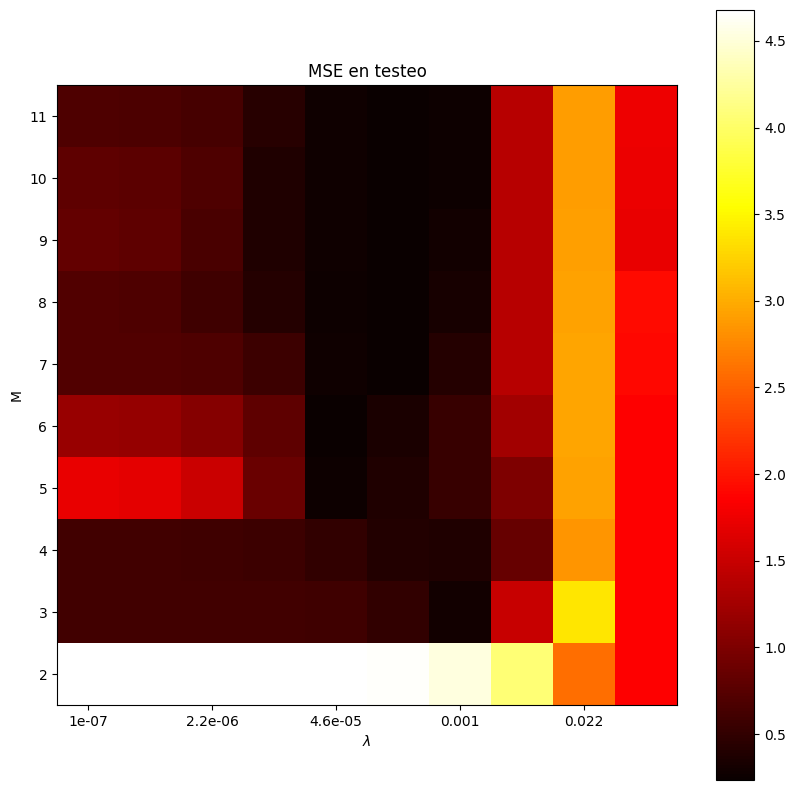

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Hagamos la gráfica de colores de test_errors en función de los valores de lambda y M
plt.imshow(test_errors_2D, cmap='hot', origin='lower')

plt.yticks(range(len(degrees)), degrees)
# Para que no se nos llene demasiado la imagen, vamos mostrar salteando de a 10 valores de Lambda
paso = 2
# Convierte a un string con 2 dígitos significativos
lambda_redondeado = ["{:.2g}".format(valor) for valor in lls]
# Elije a cada 2
lambda_seleccionado = lambda_redondeado[::paso]

plt.xticks(range(0, len(lls), paso), lambda_seleccionado)

# Agrega la barra de colores
plt.colorbar()

# Agrega los ejes y el título
plt.xlabel('$\lambda$')
plt.ylabel('M')
plt.title('MSE en testeo')

# Show the plot
plt.show()

Claramente los menores valores del MSE ocurren para $\lambda$ entre $10^{-5}$ y $10^{-3}$, aunque no se ve claramente que el mínimo está en M = 11, justamente porque el resultado no depende mucho de M, como vimos en la primer gráfica. Lo que se ve es que necesitamos M >5